# Temporal and Spatial Patterns of San Francisco Film Locations

## Research Question





How has the number of film and TV productions in San Francisco changed over time, and are there noticeable trends in production activity across decades?

**Why?:** 
Understanding temporal trends in media production can reveal how San Francisco has evolved as a filming location, highlight popular neighborhoods, and show patterns in industry activity over time.

## Dataset Documentation


**Dataset Name:** Film_Locations_in_San_Francisco.csv

**Source:** [Data SF Open Data Catalog](https://catalog.data.gov/dataset/film-locations-in-san-francisco)  

**Provider/Organization:** City of San Francisco

**Brief Description:**  
This dataset contains information about film and television production locations in San Francisco. Each row represents a specific filming instance and includes details such as title, release year, location, production company, director, actors, and geographic coordinates.

**Time Period:** Varies by entry, ranging from the 1915 to 2023.

**Access & Use Information:**  
This is a public, non-federal dataset. It is intended for public access and use, covered by different Terms of Use than Data.gov.

**Why I Chose This Dataset:**  
I am interested in analyzing temporal trends in film and TV productions in San Francisco to see how production activity has evolved over time and which neighborhoods are most popular for filming and the topic was interesting when I worked with it in Lab 2.


## Code

### Importing the Dataset


This section loads the `Film_Locations_in_San_Francisco.csv` dataset from my S3 bucket into a pandas DataFrame and previews the first few rows to confirm successful import.


In [2]:
# Ignore warnings to keep the notebook output clean
import warnings
warnings.simplefilter('ignore')

# Import pandas for data manipulation
import pandas as pd

# Load the dataset from your S3 bucket into a pandas DataFrame
df = pd.read_csv('s3://quinn-ia340-lab1/Film_Locations_in_San_Francisco.csv')

# Show the first 5 rows to confirm the dataset loaded correctly
df.head()


,Title,Release Year,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,...,Point,Longitude,Latitude,Analysis Neighborhood,Supervisor District,data_as_of,data_loaded_at,SF Find Neighborhoods,Analysis Neighborhoods,Current Supervisor Districts
0,"Murder in the First, Season 3",2016,600 Octavia Street,NaN,Turner North Center Productions,Turner Network Television (TNT),Steven Bochcho,Eric Lodal,Taye Diggs,Kathleen Robertson,...,POINT (-122.4247155 37.7778237),-122.424716,37.777824,Hayes Valley,5.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,22.0,9.0,11.0
1,Terminator - Genisys,2015,"Mission St., Embarcadero, and Front between Cl...",NaN,T5 Productions LLC,Paramount Pictures,Alan Taylor,James Cameron,Arnold Schwarzenegger,Jason Clarke,...,POINT (-122.3936136 37.7954425),-122.393614,37.795443,Financial District/South Beach,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,108.0,8.0,3.0
2,Terminator - Genisys,2015,Powell St at Geary St,NaN,T5 Productions LLC,Paramount Pictures,Alan Taylor,James Cameron,Arnold Schwarzenegger,Jason Clarke,...,POINT (-122.4082534 37.7873806),-122.408253,37.787381,Tenderloin,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,19.0,36.0,3.0
3,Faces of Death,1978,NaN,NaN,F.O.D Productions,Aquarius Releasing,Conan Le Cilaire,Alan Black,Michael Carr,NaN,...,NaN,NaN,NaN,NaN,NaN,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,NaN,NaN,NaN
4,Chance- Season 1 ep103,2016,60 Potomac,NaN,TVM Productions,HULU,Michael Lehmann,Kem Nunn,Hugh Laurie,Gretchen Mol,...,POINT (-122.4324326 37.7701803),-122.432433,37.770180,Haight Ashbury,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,28.0,3.0,5.0


### Cleaning the Dataset

In [3]:
df.info()       # Overview of columns, non-null counts, and data types
df.describe()   # Summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Title                         2084 non-null   object 
 1   Release Year                  2084 non-null   int64  
 2   Locations                     2030 non-null   object 
 3   Fun Facts                     464 non-null    object 
 4   Production Company            2082 non-null   object 
 5   Distributor                   1945 non-null   object 
 6   Director                      2079 non-null   object 
 7   Writer                        2074 non-null   object 
 8   Actor 1                       2080 non-null   object 
 9   Actor 2                       1991 non-null   object 
 10  Actor 3                       1612 non-null   object 
 11  Point                         1981 non-null   object 
 12  Longitude                     1981 non-null   float64
 13  Lat

,Release Year,Longitude,Latitude,Supervisor District,SF Find Neighborhoods,Analysis Neighborhoods,Current Supervisor Districts
count,2084.000000,1981.000000,1981.000000,1923.000000,1925.000000,1919.000000,1924.000000
mean,2003.349808,-122.418564,37.782233,4.833073,57.757922,18.630537,5.725572
std,19.600131,0.032000,0.030727,2.535022,37.814937,11.333715,3.150506
min,1915.000000,-122.530078,36.845917,1.000000,1.000000,1.000000,1.000000
25%,1993.000000,-122.428935,37.769982,3.000000,21.000000,8.000000,3.000000
50%,2015.000000,-122.412460,37.788765,3.000000,50.000000,20.000000,5.000000
75%,2017.000000,-122.404479,37.797467,6.000000,104.000000,27.000000,9.000000
max,2023.000000,-121.535720,37.896116,11.000000,117.000000,41.000000,11.000000


In [4]:
df.isnull().sum()  # Check how many missing values per column

Title                              0
Release Year                       0
Locations                         54
Fun Facts                       1620
Production Company                 2
Distributor                      139
Director                           5
Writer                            10
Actor 1                            4
Actor 2                           93
Actor 3                          472
Point                            103
Longitude                        103
Latitude                         103
Analysis Neighborhood            161
Supervisor District              161
data_as_of                         0
data_loaded_at                     0
SF Find Neighborhoods            159
Analysis Neighborhoods           165
Current Supervisor Districts     160
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
# This will delete duplicates

In [8]:
# Drop all rows with any missing values
df.dropna(inplace=True)

# Check that there are no more missing values
df.isnull().sum()
#We now can see all the missing values have been deleted from rows

Title                           0
Release Year                    0
Locations                       0
Fun Facts                       0
Production Company              0
Distributor                     0
Director                        0
Writer                          0
Actor 1                         0
Actor 2                         0
Actor 3                         0
Point                           0
Longitude                       0
Latitude                        0
Analysis Neighborhood           0
Supervisor District             0
data_as_of                      0
data_loaded_at                  0
SF Find Neighborhoods           0
Analysis Neighborhoods          0
Current Supervisor Districts    0
dtype: int64

In [9]:
# Check the first 5 rows
df.head()

,Title,Release Year,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,...,Point,Longitude,Latitude,Analysis Neighborhood,Supervisor District,data_as_of,data_loaded_at,SF Find Neighborhoods,Analysis Neighborhoods,Current Supervisor Districts
9,The Last Black Man in San Francisco,2019,900 Innes Ave,Boat dock,"LBMISF, LLC",A24,Joe Talbot,"Joe Talbot, Jimmie Fails, Rob Richert",Jimmie Fails,Jonathan Majors,...,POINT (-122.3757745 37.7322136),-122.375775,37.732214,Bayview Hunters Point,10.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,76.0,1.0,9.0
25,I Remember Mama,1948,"Fairmont Hotel (950 Mason Street, Nob Hill)",In 1945 the Fairmont hosted the United Nations...,RKO Radio Pictures,RKO Radio Pictures,George Stevens,DeWitt Bodeen,Irene Dunne,Barbara Bel Geddes,...,POINT (-122.4100923 37.7923883),-122.410092,37.792388,Nob Hill,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,16.0,21.0,3.0
34,The Towering Inferno,1974,"Fairmont Hotel (950 Mason Street, Nob Hill)",In 1945 the Fairmont hosted the United Nations...,Irwin Allen Productions,Twentieth Century - Fox,John Guillermin,Stirling Silliphant,Steve McQueen,Paul Newman,...,POINT (-122.4100923 37.7923883),-122.410092,37.792388,Nob Hill,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,16.0,21.0,3.0
45,Looking Season 2 ep 204,2015,"Dolores Park, San Francisco",Russell Tovey originally auditioned for the ro...,"Mission Street Productions, LLC",HBO,Andrew Haigh,Michael Lannan,Jonathan Groff,Frankie Alvarez,...,POINT (-122.4266135 37.7608223),-122.426614,37.760822,Castro/Upper Market,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,37.0,5.0,5.0
80,Sense8 - Season 2,2016,"Billy Goat Hill, Castro St. & 30th St.",This park was the location of a popular swing ...,"Unpronounceable Productions, LLC",Netflix,Wachowski Siblings,"J. Michael Straczynski, Wachowiski Siblings",Jamie Clayton,Daryl Hannah,...,POINT (-122.4331318 37.7413462),-122.433132,37.741346,Glen Park,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,59.0,10.0,5.0


The rows look good so we can see that the Nan data has been deleted

In [11]:
#This is to check if the lat and long are actually within San Fran range
df = df[(df['Latitude'] >= 37.70) & (df['Latitude'] <= 37.83)]
df = df[(df['Longitude'] >= -122.52) & (df['Longitude'] <= -122.36)]


In [13]:
#Standardize text
df['Director'] = df['Director'].str.title()
df['Production Company'] = df['Production Company'].str.title()
#One more time I want to drop duplicates
df.drop_duplicates(inplace=True)


In [16]:
# Check the first 5 rows one more time and the last 5
df.tail()
df.head()

,Title,Release Year,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,...,Point,Longitude,Latitude,Analysis Neighborhood,Supervisor District,data_as_of,data_loaded_at,SF Find Neighborhoods,Analysis Neighborhoods,Current Supervisor Districts
9,The Last Black Man in San Francisco,2019,900 Innes Ave,Boat dock,"Lbmisf, Llc",A24,Joe Talbot,"Joe Talbot, Jimmie Fails, Rob Richert",Jimmie Fails,Jonathan Majors,...,POINT (-122.3757745 37.7322136),-122.375775,37.732214,Bayview Hunters Point,10.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,76.0,1.0,9.0
25,I Remember Mama,1948,"Fairmont Hotel (950 Mason Street, Nob Hill)",In 1945 the Fairmont hosted the United Nations...,Rko Radio Pictures,RKO Radio Pictures,George Stevens,DeWitt Bodeen,Irene Dunne,Barbara Bel Geddes,...,POINT (-122.4100923 37.7923883),-122.410092,37.792388,Nob Hill,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,16.0,21.0,3.0
34,The Towering Inferno,1974,"Fairmont Hotel (950 Mason Street, Nob Hill)",In 1945 the Fairmont hosted the United Nations...,Irwin Allen Productions,Twentieth Century - Fox,John Guillermin,Stirling Silliphant,Steve McQueen,Paul Newman,...,POINT (-122.4100923 37.7923883),-122.410092,37.792388,Nob Hill,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,16.0,21.0,3.0
45,Looking Season 2 ep 204,2015,"Dolores Park, San Francisco",Russell Tovey originally auditioned for the ro...,"Mission Street Productions, Llc",HBO,Andrew Haigh,Michael Lannan,Jonathan Groff,Frankie Alvarez,...,POINT (-122.4266135 37.7608223),-122.426614,37.760822,Castro/Upper Market,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,37.0,5.0,5.0
80,Sense8 - Season 2,2016,"Billy Goat Hill, Castro St. & 30th St.",This park was the location of a popular swing ...,"Unpronounceable Productions, Llc",Netflix,Wachowski Siblings,"J. Michael Straczynski, Wachowiski Siblings",Jamie Clayton,Daryl Hannah,...,POINT (-122.4331318 37.7413462),-122.433132,37.741346,Glen Park,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,59.0,10.0,5.0


### Summary Tables and New Variable

In [18]:
# Count films per release year
films_per_year = df.groupby('Release Year').size().reset_index(name='Film Count')
films_per_year.tail()


,Release Year,Film Count
41,2016,19
42,2017,11
43,2018,23
44,2019,5
45,2021,1


To examine temporal trends in film production locations in San Francisco, we aggregate the dataset by release year to calculate the number of films released each year. This allows us to visualize patterns, spikes, and declines over time

In [19]:
# Filter films after 2000
recent_films = df[df['Release Year'] >= 2000]
recent_films.head()


,Title,Release Year,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,...,Point,Longitude,Latitude,Analysis Neighborhood,Supervisor District,data_as_of,data_loaded_at,SF Find Neighborhoods,Analysis Neighborhoods,Current Supervisor Districts
9,The Last Black Man in San Francisco,2019,900 Innes Ave,Boat dock,"Lbmisf, Llc",A24,Joe Talbot,"Joe Talbot, Jimmie Fails, Rob Richert",Jimmie Fails,Jonathan Majors,...,POINT (-122.3757745 37.7322136),-122.375775,37.732214,Bayview Hunters Point,10.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,76.0,1.0,9.0
45,Looking Season 2 ep 204,2015,"Dolores Park, San Francisco",Russell Tovey originally auditioned for the ro...,"Mission Street Productions, Llc",HBO,Andrew Haigh,Michael Lannan,Jonathan Groff,Frankie Alvarez,...,POINT (-122.4266135 37.7608223),-122.426614,37.760822,Castro/Upper Market,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,37.0,5.0,5.0
80,Sense8 - Season 2,2016,"Billy Goat Hill, Castro St. & 30th St.",This park was the location of a popular swing ...,"Unpronounceable Productions, Llc",Netflix,Wachowski Siblings,"J. Michael Straczynski, Wachowiski Siblings",Jamie Clayton,Daryl Hannah,...,POINT (-122.4331318 37.7413462),-122.433132,37.741346,Glen Park,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,59.0,10.0,5.0
107,Venom,2018,Embarcadero btwn Folsom and Bryant,Motorcycle/SUV chase scene,"L.O.Z. Productions, Inc.","Columbia Pictures, Sony Pictures Releasing",Ruben Fleischer,"Jeff Pinkner, Scott Rosenberg",Tom Hardy,Michelle Wiliams,...,POINT (-122.3895614 37.7904588),-122.389561,37.790459,Financial District/South Beach,6.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,30.0,8.0,10.0
166,When We Rise,2017,City Hall,Exterior scenes include re-creating the White ...,Film 49 Productions,Amercian Broadcasting Company,Gus Van Sant,Dustin Lance Black,Guy Pierce,Mary-Louise Parker,...,POINT (-122.4192417 37.779275),-122.419242,37.779275,Tenderloin,5.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,21.0,36.0,10.0


In [22]:
films_per_neighborhood_year = df.groupby(['Release Year', 'Analysis Neighborhood']).size().reset_index(name='Film Count')
films_per_neighborhood_year.tail()


,Release Year,Analysis Neighborhood,Film Count
165,2018,Tenderloin,3
166,2019,Bayview Hunters Point,3
167,2019,Financial District/South Beach,1
168,2019,Nob Hill,1
169,2021,Nob Hill,1


To understand temporal and spatial trends in film production in San Francisco, we created two key summary tables:

1. **Films per Year (`films_per_year`)** – Aggregates the total number of films released each year. This highlights **temporal trends**, helping us see periods of increased or decreased filming activity, identify spikes, and analyze patterns over time.

2. **Films per Neighborhood per Year (`films_per_neighborhood_year`)** – Aggregates the number of films by `Analysis Neighborhood` and year. This captures **spatial patterns** in film production, showing which neighborhoods are most frequently used and how this changes over time.

By combining these tables, we can analyze **where and when films were shot**, which directly supports our research question on temporal trends and location distribution of film production in San Francisco. These summaries provide insight into both **volume** and **geographic concentration**, allowing for targeted visualizations and deeper exploration of trends.

### Query: Top Neighborhoods for Filming Since 2000


In [23]:
# Filter for films released in or after 2000
films_2000_onwards = df[df['Release Year'] >= 2000]

# Count films per neighborhood since 2000
top_neighborhoods = films_2000_onwards.groupby('Analysis Neighborhood').size().reset_index(name='Film Count')

# Sort neighborhoods by film count in descending order
top_neighborhoods = top_neighborhoods.sort_values(by='Film Count', ascending=False)

# Show the top 10 neighborhoods
top_neighborhoods.head(10)


,Analysis Neighborhood,Film Count
4,Financial District/South Beach,10
12,North Beach,7
11,Nob Hill,7
16,Tenderloin,7
10,Mission,6
3,Chinatown,5
2,Castro/Upper Market,4
0,Bayview Hunters Point,3
14,Russian Hill,2
7,Hayes Valley,2


By filtering for films released in or after 2000, we focus on recent trends in San Francisco's film production. Counting films per neighborhood since 2000 highlights which areas are most popular for filming today. This analysis helps identify current hotspots and informs patterns in location selection over the past two decades.

### Visualizing Film Trends


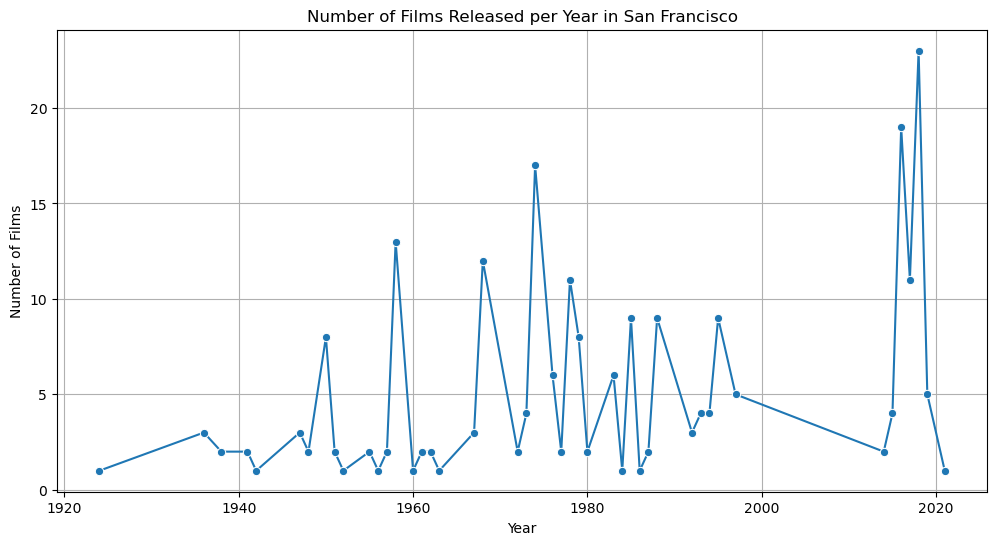

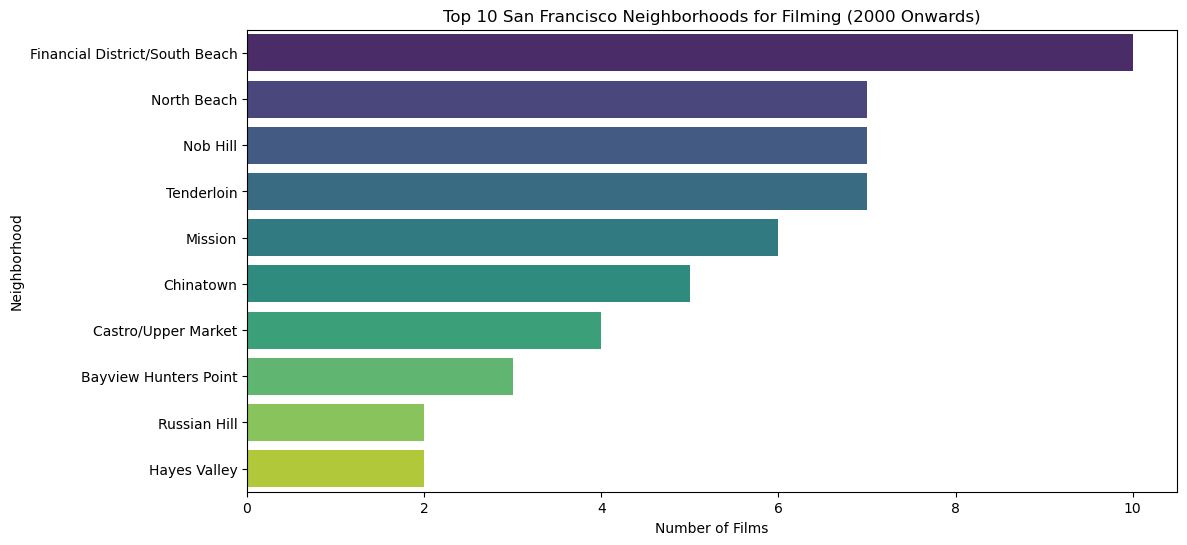

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chart 1: Line chart of films per year ---
plt.figure(figsize=(12,6))
sns.lineplot(data=films_per_year, x='Release Year', y='Film Count', marker='o')
plt.title('Number of Films Released per Year in San Francisco')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()

# --- Chart 2: Bar chart of top neighborhoods since 2000 ---
plt.figure(figsize=(12,6))
sns.barplot(data=top_neighborhoods.head(10), x='Film Count', y='Analysis Neighborhood', palette='viridis')
plt.title('Top 10 San Francisco Neighborhoods for Filming (2000 Onwards)')
plt.xlabel('Number of Films')
plt.ylabel('Neighborhood')
plt.show()

The **line chart** shows films released per year in San Francisco from the 1920s–2022, highlighting peaks in the late 1950s, mid-1970s, late 1980s, and especially 2018–2020, reflecting periods of increased filming activity.

The **horizontal bar chart** shows the top 10 neighborhoods for filming since 2000. The Financial District/South Beach leads, followed by North Beach, Nob Hill, and Tenderloin, indicating central and iconic areas attract filmmakers.

These charts reveal both **temporal and spatial trends**: film production varies over time, and certain neighborhoods consistently draw filmmakers due to their visual appeal and accessibility.

## Conclusions


In my analysis of film locations in San Francisco, I found clear temporal and spatial patterns. Film production has varied over time, with notable peaks in the late 20th century and especially around 2018–2020, which suggests that industry trends, city incentives, or cultural factors may have influenced filming activity. Spatially, I observed that filming is concentrated in central, historic, and visually iconic neighborhoods such as the Financial District/South Beach, North Beach, Nob Hill, and Tenderloin, indicating a preference for locations that are both accessible and aesthetically appealing.

By combining temporal trends and neighborhood-level analysis, I was able to better understand how San Francisco’s geography interacts with film production. The new summary variables and visualizations I created helped me identify overall trends and highlight specific neighborhoods that consistently attract filmmakers.